In [45]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import functools
import warnings
import seaborn as sns
import pandas as pd
from LinearRegression import LinearRegression as LinReg
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

for 1 feature x1 we can get --> [1, x1, (x1, x1), (x1, x1, x1),... (x1, x1, ... m times)] <br>
0 deg -> 1 <br>
1 deg -> x1 <br>
2 deg -> (x1, x1)

In [46]:
def get_combinations(x, degree) : 
    return itertools.combinations_with_replacement(x, degree)

def compute_new_feature(items) : 
    return functools.reduce(lambda x, y : x*y, items)

In [47]:
{items : compute_new_feature(items) for items in get_combinations([1], 3)}

{(1, 1, 1): 1}

In [48]:
{items : compute_new_feature(items) for items in get_combinations([2, 3], 3)}

{(2, 2, 2): 8, (2, 2, 3): 12, (2, 3, 3): 18, (3, 3, 3): 27}

In [49]:
{items : compute_new_feature(items) for items in get_combinations([1, 4], 4)}

{(1, 1, 1, 1): 1,
 (1, 1, 1, 4): 4,
 (1, 1, 4, 4): 16,
 (1, 4, 4, 4): 64,
 (4, 4, 4, 4): 256}

In [50]:
def polynomial_transform(x, degree, logging = False) : 
    # convert to feature matrix 
    if x.ndim == 1 : 
        x = x[:,None]

    x_t = x.transpose()
    feature = [np.ones(len(x))] # populates 1s as first feature for each example 

    if logging : 
        print('Input : ', x)

    for degree in range(1, degree + 1) : 
        for items in get_combinations(x_t, degree) :  # generate combinations
            feature.append(compute_new_feature(items)) # combine feature into a new feature 
            if logging : 
                print(items, " : ", compute_new_feature(items))
    
    if logging : 
        print(np.asarray(feature).transpose())
    
    return np.asarray(feature).transpose()

In [51]:
polynomial_transform(np.array([2]), 3, logging= True)

Input :  [[2]]
(array([2]),)  :  [2]
(array([2]), array([2]))  :  [4]
(array([2]), array([2]), array([2]))  :  [8]
[[1. 2. 4. 8.]]


array([[1., 2., 4., 8.]])

In [52]:
polynomial_transform(np.array([2, 3]), 2, logging= True)

Input :  [[2]
 [3]]
(array([2, 3]),)  :  [2 3]
(array([2, 3]), array([2, 3]))  :  [4 9]
[[1. 2. 4.]
 [1. 3. 9.]]


array([[1., 2., 4.],
       [1., 3., 9.]])

In [53]:
polynomial_transform(np.array([[2, 3], [4, 5]]), 2, logging= True)

Input :  [[2 3]
 [4 5]]
(array([2, 4]),)  :  [2 4]
(array([3, 5]),)  :  [3 5]
(array([2, 4]), array([2, 4]))  :  [ 4 16]
(array([2, 4]), array([3, 5]))  :  [ 6 20]
(array([3, 5]), array([3, 5]))  :  [ 9 25]
[[ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


array([[ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [54]:
polynomial_transform(np.array([[2, 3], [4, 5]]), 3, logging= True)

Input :  [[2 3]
 [4 5]]
(array([2, 4]),)  :  [2 4]
(array([3, 5]),)  :  [3 5]
(array([2, 4]), array([2, 4]))  :  [ 4 16]
(array([2, 4]), array([3, 5]))  :  [ 6 20]
(array([3, 5]), array([3, 5]))  :  [ 9 25]
(array([2, 4]), array([2, 4]), array([2, 4]))  :  [ 8 64]
(array([2, 4]), array([2, 4]), array([3, 5]))  :  [12 80]
(array([2, 4]), array([3, 5]), array([3, 5]))  :  [ 18 100]
(array([3, 5]), array([3, 5]), array([3, 5]))  :  [ 27 125]
[[  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   5.  16.  20.  25.  64.  80. 100. 125.]]


array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [55]:
polynomial_transform(np.array([2]), 0, logging= True)

Input :  [[2]]
[[1.]]


array([[1.]])

In [56]:
def create_nonlin_training_set(func, sample_size, std) : 
    x = np.linspace(0, 1, sample_size)
    y = func(x) + np.random.normal(scale = std, size = x.shape)
    return x, y

def nonlin(x) : 
    return np.sin(2*np.pi * x)

In [57]:
def visualize_training_data(X_train, y_train) : 
    points = np.linspace(0, 1, 100)
    output = nonlin(points)

    plt.scatter(X_train, y_train, facecolor = "none", edgecolor='b', s = 50, label = 'training data')
    plt.plot(points, output, c = 'g', label = "$\sin(2\pi x)$")
    plt.xlabel('$x_1$')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def visualize_model_fit(X, y, lin_reg, degree) : 
    points = np.linspace(0, 1, 100)
    output = nonlin(points)

    if degree > 0 : 
        plt.scatter(X, y, facecolor = "none", edgecolor = 'b', s = 50, label = 'training data')

        plt.plot(points, output, c = 'g', label = '$\sin(2\pi x)$')

        y_hat = lin_reg.predict(polynomial_transform(points, degree))
        plt.plot(points, y_hat, c = 'r', label = "$h_\mathbf{w}(x)$")
        plt.xlabel('$x_1$')
        plt.ylabel('y')
        plt.ylim(-1.5, 1.5)
        plt.title("M={}".format(degree))

# def visualize_model_fit_reg(X, y, lin_reg, degree, reg_rate) : 
#     points = np.linspace(0, 1, 100)
#     output = nonlin(points)

#     if degree > 0 : 
#         plt.scatter(X, y, facecolor = "none", edgecolor = 'b', s = 50, label = 'training data')

#         plt.plot(points, output, c = 'g', label = '$\sin(2\pi x)$')

#         y_hat = lin_reg.predict(polynomial_transform(points, degree))
#         plt.plot(points, y_hat, c = 'r', label = "$h_\mathbf{w}(x)$")
#         plt.xlabel('$x_1$')
#         plt.ylabel('y')
#         plt.ylim(-1.5, 1.5)
#         plt.title("M={}".format(degree))

def visualize_regularized_model_fit(X, y, lin_reg, degree, lam) : 
    points = np.linspace(0, 1, 100)
    output = nonlin(points)

    if degree > 0 : 
        plt.scatter(X, y, facecolor = "none", edgecolor = 'b', s = 50, label = 'training data')

        plt.plot(points, output, c = 'g', label = '$\sin(2\pi x)$')

        y_hat = lin_reg.predict(polynomial_transform(points, degree))
        plt.plot(points, y_hat, c = 'r', label = "$h_\mathbf{w}(x)$")
        plt.xlabel('$x_1$')
        plt.ylabel('y')
        plt.ylim(-1.5, 1.5)
        plt.title("M={}, λ = {}".format(degree, lam))

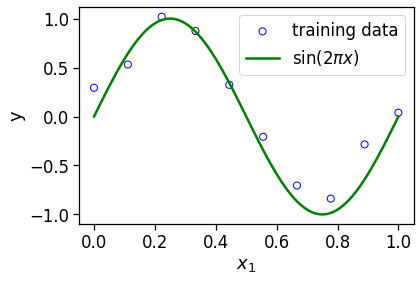

In [58]:
num_samples = 10 
X, y = create_nonlin_training_set(nonlin, num_samples, 0.2)
visualize_training_data(X, y)

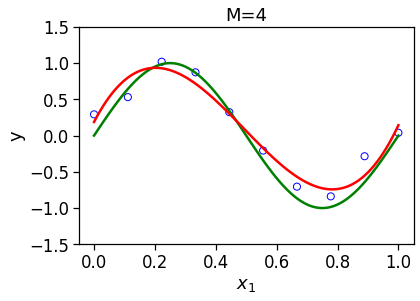

In [59]:
degree = 4
X_transform = polynomial_transform(X, degree)
lin_reg = LinReg()
lin_reg.fit(X_transform, y)
visualize_model_fit(X, y, lin_reg, degree)

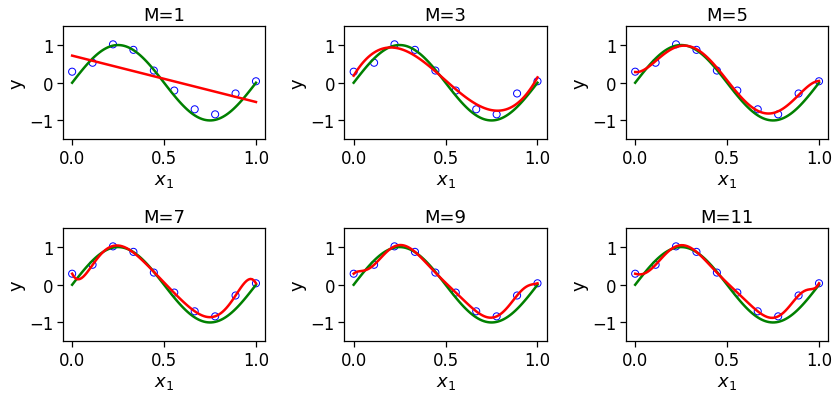

In [60]:
f = plt.figure(figsize = (12, 8))
sns.set_context("notebook", font_scale= 1.5, rc ={"lines.linewidth" : 2.5}); 

for i, degree in enumerate([1, 3, 5, 7, 9, 11]) : 
    plt.subplot(3, 3, i+1)
    X_transform = polynomial_transform(X, degree)
    lin_reg = LinReg()
    lin_reg.fit(X_transform, y)
    visualize_model_fit(X, y, lin_reg, degree)

f.tight_layout()
# plt.legend()
plt.show()

In [61]:
def convert_dict_to_df(w_dict, degree) : 
    poly_w_dict = {i : np.array(np.zeros(degree)) for i in range(degree)}
    for deg in poly_w_dict : 
        weight_vec = w_dict[deg]
        for i in range(len(weight_vec)) : 
            poly_w_dict[deg][i] = weight_vec[i]

    poly_w_df = pd.DataFrame(poly_w_dict)
    poly_w_df.columns = ['w_'+str(i) for i in range(degree)]
    return poly_w_df

def plot_model_selection(training_errors, val_errors) : 
    plt.plot(training_errors, 'o-', mfc = 'b', ms=10)
    plt.plot(val_errors, 'o-', mfc = 'none', mec='r', ms=10)
    plt.legend()
    plt.xlabel('degree')
    plt.ylabel('RMSE')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


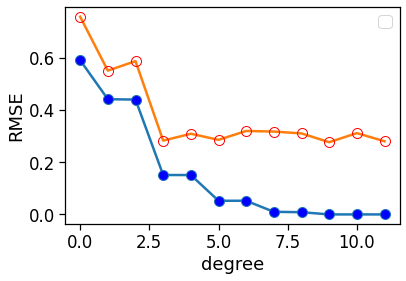

In [62]:
training_errors = []
val_errors = []
w_dict = {}

x_val = np.linspace(0, 1, 100)
y_val = nonlin(x_val)

for i in range(12) : 
    X_transform = polynomial_transform(X, i)
    x_val_transform = polynomial_transform(x_val, i)
    lin_reg = LinReg()
    lin_reg.fit(X_transform, y)

    w_dict[i] = lin_reg.w
    training_errors.append(lin_reg.rmse(X_transform, y))
    val_errors.append(lin_reg.rmse(x_val_transform, y_val + np.random.normal(
        scale = 0.25, size = len(y_val)
    )))
    
plot_model_selection(training_errors, val_errors)

high variance 

In [63]:
convert_dict_to_df(w_dict, 10)

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9
0,0.10423,0.719139,0.779779,0.187386,0.188042,0.284167,0.284948,0.293502,0.293199,0.293077
1,0.00000,-1.229818,-1.639132,8.114190,8.089602,-0.667431,-0.875726,-10.126535,-7.959100,4.775194
2,0.00000,0.000000,0.409313,-25.296298,-25.172128,47.823177,50.392964,203.038561,159.329130,-134.810887
3,0.00000,0.000000,0.000000,17.137074,16.937911,-189.395484,-200.456090,-1105.661916,-775.980056,1873.447245
4,0.00000,0.000000,0.000000,0.000000,0.099582,236.604369,257.978724,2817.503432,1573.796830,-10872.859420
5,0.00000,0.000000,0.000000,0.000000,0.000000,-94.601915,-113.614777,-3846.147793,-1256.870181,32652.444606
6,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,6.337621,2715.060754,-305.763127,-55830.212610
7,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-773.920895,1075.563114,54930.830389
8,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-462.371002,-28955.725141
9,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6331.856475


# Fix over fitting adding more data 

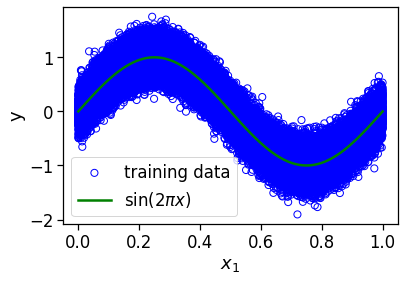

In [64]:
num_samples = 100000 
X, y = create_nonlin_training_set(nonlin, num_samples, 0.2)
visualize_training_data(X, y)

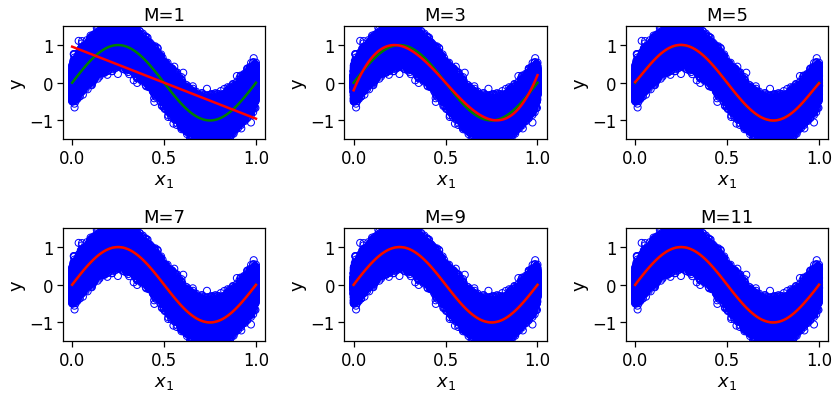

In [65]:
f = plt.figure(figsize = (12, 8))
sns.set_context("notebook", font_scale= 1.5, rc ={"lines.linewidth" : 2.5}); 

for i, degree in enumerate([1, 3, 5, 7, 9, 11]) : 
    plt.subplot(3, 3, i+1)
    X_transform = polynomial_transform(X, degree)
    lin_reg = LinReg()
    lin_reg.fit(X_transform, y)
    visualize_model_fit(X, y, lin_reg, degree)

f.tight_layout()
# plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


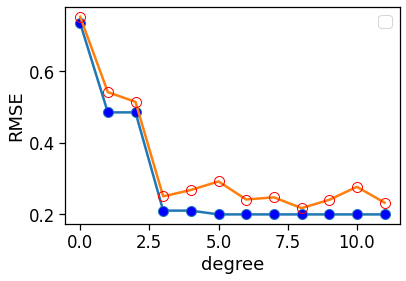

In [66]:
training_errors = []
val_errors = []
w_dict = {}

x_val = np.linspace(0, 1, 100)
y_val = nonlin(x_val)

for i in range(12) : 
    X_transform = polynomial_transform(X, i)
    x_val_transform = polynomial_transform(x_val, i)
    lin_reg = LinReg()
    lin_reg.fit(X_transform, y)

    w_dict[i] = lin_reg.w
    training_errors.append(lin_reg.rmse(X_transform, y))
    val_errors.append(lin_reg.rmse(x_val_transform, y_val + np.random.normal(
        scale = 0.25, size = len(y_val)
    )))
    
plot_model_selection(training_errors, val_errors)

In [67]:
convert_dict_to_df(w_dict, 11)

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,w_10
0,0.001514,0.956838,0.955644,-0.200678,-0.199947,0.018355,0.015957,0.000453,-0.000592,-0.001861,-0.000577
1,0.000000,-1.910647,-1.903483,11.972723,11.958101,5.408585,5.509318,6.377678,6.452880,6.567155,6.425863
2,0.000000,0.000000,-0.007164,-34.697853,-34.632051,11.215472,10.208119,-1.515238,-2.831342,-5.345562,-1.530348
3,0.000000,0.000000,0.000000,23.127126,23.024768,-99.236213,-95.206749,-30.075794,-20.424126,3.042691,-41.046026
4,0.000000,0.000000,0.000000,0.000000,0.051179,137.595126,130.039841,-49.071899,-85.266125,-199.668860,70.380611
5,0.000000,0.000000,0.000000,0.000000,0.000000,-55.017579,-48.368914,209.553109,284.837626,605.168485,-367.022570
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.216222,-188.493549,-276.325799,-810.213615,1350.228441
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.222093,106.997018,629.990751,-2368.188188
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.443731,-291.284499,2238.435655
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.742393,-1125.041220


# ridge : 

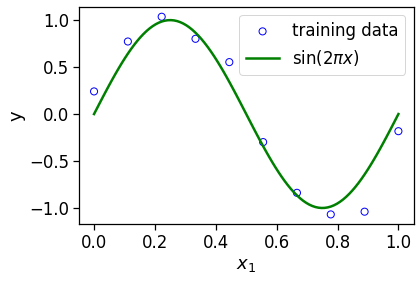

In [68]:
num_samples = 10 
X, y = create_nonlin_training_set(nonlin, num_samples, 0.2)
visualize_training_data(X, y)

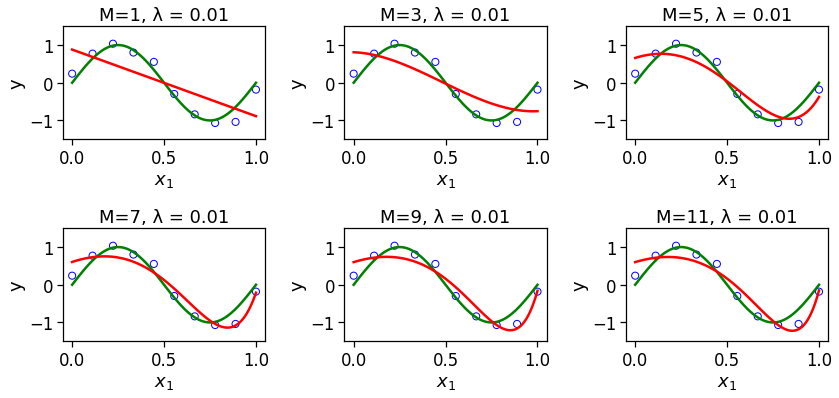

In [69]:
f = plt.figure(figsize = (12, 8))
sns.set_context("notebook", font_scale= 1.5, rc ={"lines.linewidth" : 2.5}); 

for i, degree in enumerate([1, 3, 5, 7, 9, 11]) : 
    plt.subplot(3, 3, i+1)
    X_transform = polynomial_transform(X, degree)
    lin_reg = LinReg()
    lin_reg.fitRidge(X_transform, y, reg_rate = 0.01)
    visualize_regularized_model_fit(X, y, lin_reg, degree, 0.01)

f.tight_layout()
# plt.legend()
plt.show()

0 - overfitting <br> 
1 and 10 is underfitting

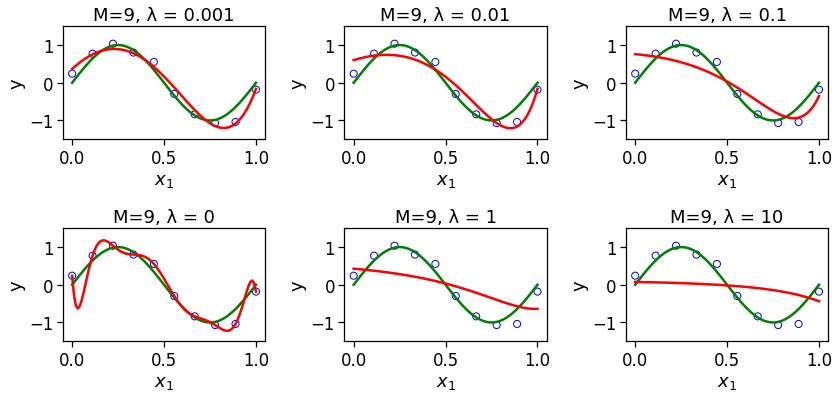

In [70]:
f = plt.figure(figsize = (12, 8))
sns.set_context("notebook", font_scale= 1.5, rc ={"lines.linewidth" : 2.5}); 
degree = 9
for i, reg_rate in enumerate([1e-3, 1e-2, 1e-1, 0, 1, 10]) : 
    plt.subplot(3, 3, i+1)
    X_transform = polynomial_transform(X, degree)
    lin_reg = LinReg()
    lin_reg.fitRidge(X_transform, y, reg_rate = reg_rate)
    visualize_regularized_model_fit(X, y, lin_reg, degree, reg_rate)

f.tight_layout()
# plt.legend()
plt.show()

In [71]:
def plot_reg_w(w_df) : 
    ax = plt.gca()
    ax.plot(w_df.T)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])
    plt.xlabel('$\lambda$')
    plt.ylabel('$\mathbf{w}$')
    plt.title('weights as a function of $\lambda$')
    plt.axis('tight')
    plt.show()

def plot_learning_curve(err_df) : 
    ax = plt.gca()
    ax.plot(err_df)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])
    plt.xlabel('$\lambda$')
    plt.ylabel('RMSE')
    plt.title('training and validation losses as a function of $\lambda$')
    plt.axis('tight')
    plt.legend(['training', 'validation'])
    plt.show()

In [72]:
training_errors = {}
val_errors = {}
w_dict = {}
degree = 9

x_val = np.linspace(0, 1, 100)
y_val = nonlin(x_val)

X_transform = polynomial_transform(X, degree)
x_val_transform = polynomial_transform(x_val, degree)

for reg_rate in [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100] : 
    lin_reg = LinReg()
    lin_reg.fitRidge(X_transform, y, reg_rate = reg_rate)

    w_dict[reg_rate] = lin_reg.w
    training_errors[reg_rate] = lin_reg.rmseRidge(X_transform, y, reg_rate)
    val_errors[reg_rate] = lin_reg.rmseRidge(x_val_transform, y_val + np.random.normal(
        scale = 0.25, size = len(y_val)
    ), reg_rate)

error_df = pd.DataFrame([training_errors, val_errors]).T
w_df = pd.DataFrame(w_dict)

* too much regularization --> both training and validation loss high --> under fitting
* very small regularization --> overfitting 

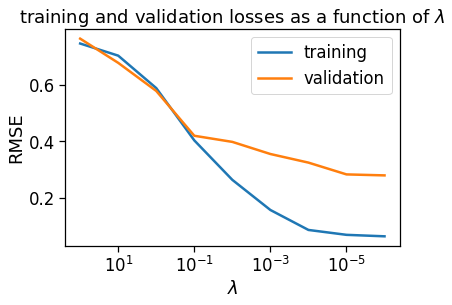

In [73]:
plot_learning_curve(error_df)

9 deg polynomial --> 10 weights <br>
as we reduce the reg rate the weights start increasing --> risk of overfitting 

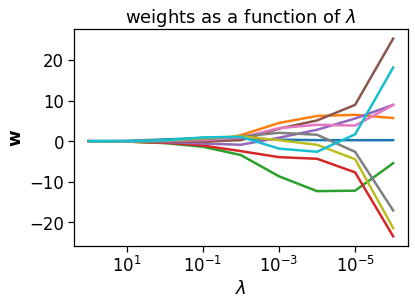

In [74]:
plot_reg_w(w_df)

In [75]:
from sklearn.linear_model import Lasso 

reg_rate = 0.01 
lasso = Lasso(alpha = reg_rate)
lasso.fit(X_transform, y)

lin_reg = LinReg()
_ = lin_reg.fitRidge(X_transform, y, 0)

lasso compresses the weights to 0, only assigns non 0 value to important features. Hence lasso can be used for feature selection

* if you feel most of the features are important then use ridge 

In [76]:
compare_weight_df = pd.DataFrame({'LinReg' : lin_reg.w, 'Ridge' : w_df[0.01], 'Lasso' : lasso.coef_})
compare_weight_df

,LinReg,Ridge,Lasso
0,0.240949,0.599946,0.000000
1,-67.324384,1.481873,-0.000000
2,1666.757656,-3.430173,-3.017404
3,-14889.489883,-2.458915,-0.000000
4,68671.083637,-0.885708,-0.000000
5,-183374.404841,0.252234,0.000000
6,293950.923687,0.891136,0.000000
7,-278883.243221,1.157031,0.000000
8,144291.936347,1.179293,0.000000
9,-31366.662417,1.054824,1.893457


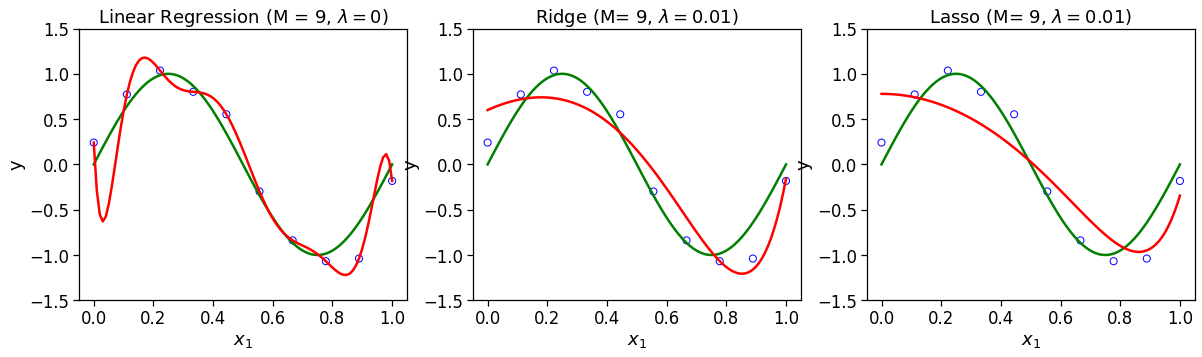

In [77]:
f = plt.figure(figsize= (20, 5))

axl = plt.subplot(1, 3, 1)
visualize_model_fit(X, y, lin_reg, degree)
plt.title('Linear Regression (M = 9, $\lambda = 0$)')

lin_reg.w = w_df[0.01]
ax2 = plt.subplot(1, 3, 2)
visualize_regularized_model_fit(X, y, lin_reg, degree,0.01)
plt.title("Ridge (M= 9, $\lambda = 0.01$)")


ax3 = plt.subplot(1, 3, 3)
visualize_regularized_model_fit(X, y, lasso, degree,0.01)
plt.title("Lasso (M= 9, $\lambda = 0.01$)");

high reg_rate underfitting

C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.955e-03, tolerance: 5.722e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == "__main__":
C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate

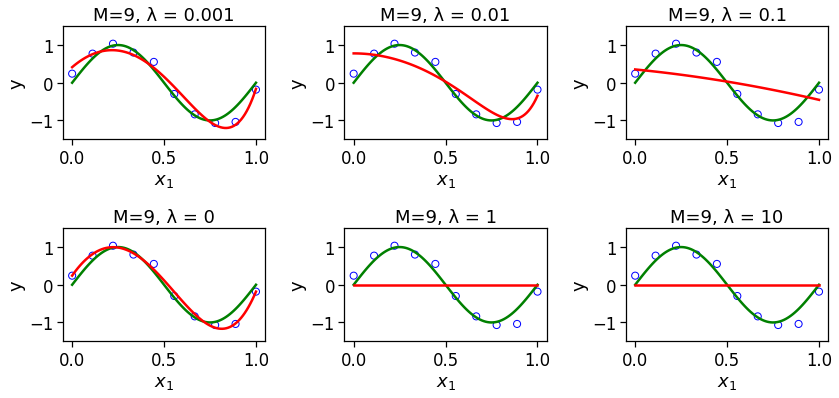

In [78]:
f = plt.figure(figsize = (12, 8))
sns.set_context("notebook", font_scale= 1.5, rc ={"lines.linewidth" : 2.5}); 
degree = 9
X_transform = polynomial_transform(X, degree)

for i, reg_rate in enumerate([1e-3, 1e-2, 1e-1, 0, 1, 10]) : 
    plt.subplot(3, 3, i+1)
    lasso = Lasso(alpha= reg_rate)
    lasso.fit(X_transform, y)
    visualize_regularized_model_fit(X, y, lasso, degree, reg_rate)

f.tight_layout()
plt.show()

In [79]:
from sklearn.metrics import mean_squared_error

training_errors = {}
val_errors = {}
w_dict = {}
degree = 9

x_val = np.linspace(0, 1, 100)
y_val = nonlin(x_val)

X_transform = polynomial_transform(X, degree)
x_val_transform = polynomial_transform(x_val, degree)

for reg_rate in [1e-10, 1e-9,  1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100] : 
    lasso = Lasso(alpha=reg_rate)
    lasso.fit(X_transform, y)

    w_dict[reg_rate] = lasso.coef_

    training_errors[reg_rate] = mean_squared_error(y, lasso.predict(X_transform), squared = False)
    val_errors[reg_rate] = mean_squared_error(y_val + np.random.normal(
        scale = 0.25, size = len(y_val)
    ), lasso.predict(x_val_transform), squared = False)

error_df = pd.DataFrame([training_errors, val_errors]).T
w_df = pd.DataFrame(w_dict)

C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.402e-02, tolerance: 5.722e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.402e-02, tolerance: 5.722e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Computer\AppData\Local\Packages\PythonSoftw

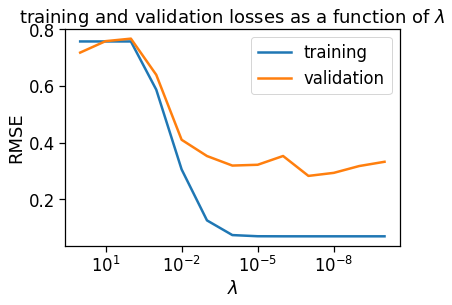

In [80]:
plot_learning_curve(error_df)

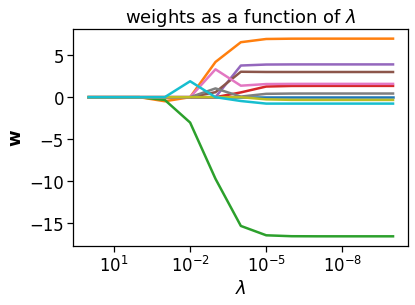

In [81]:
plot_reg_w(w_df)

* linear reg loss function has eliptical cotours 
* ridge has circular contours
* lasso has polytope contours ie why lasso gives sparse solution

## Multi-output / multiLabel

In [82]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 

X, y, coef = make_regression(
    n_samples = 100, 
    n_features = 10, 
    n_informative = 10, 
    bias = 1, 
    n_targets = 5, 
    shuffle = True, 
    coef = True, 
    random_state = 42)

In [83]:
print(X.shape)
print(y.shape)

(100, 10)
(100, 5)


In [84]:
coef

array([[93.62122462,  5.19712837, 54.12963353, 70.90605195, 87.09691237],
       [89.48166561, 54.75923762, 81.729777  , 45.23182845, 64.35776952],
       [46.26229567, 86.82725054, 72.71690698, 74.27065212, 42.54933344],
       [71.92017783, 22.84547413, 99.63339161, 97.47931621, 65.03256863],
       [19.95424509, 68.02282424,  7.2198409 ,  3.06525022, 25.76828885],
       [52.64026609, 73.15895218,  8.1629982 ,  6.0352084 , 24.7103234 ],
       [15.95446801, 87.17835666, 21.92139874, 97.58652558, 33.68957918],
       [71.40869321, 80.17280831, 33.94501925, 81.48251137,  8.01148464],
       [18.21179157, 78.96985071, 65.87077755, 49.81957165, 55.53635509],
       [16.74825823, 10.45678403, 63.64302495, 70.64757265,  3.15861448]])

In [85]:
def add_dummy_feature(x) : 
    return np.column_stack((np.ones(x.shape[0]), x))

x_dum = add_dummy_feature(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [86]:
lin_reg = LinReg()
w = lin_reg.fitMulti(X_train, y_train, reg_rate)

# np.testing.assert_almost_equal(w[1:, :], coef, decimal = 2)

In [87]:
w

array([[ 38.85531257, -10.72872836,  14.14517974,  20.54731173,
         31.468598  ],
       [ 41.3737644 ,  34.73162806,  38.31734552,  23.98407398,
         30.94801262],
       [ 23.66513259,  40.69723765,  35.85978174,  35.89903092,
         16.22341349],
       [ 29.36970484,  12.20515089,  41.42911526,  40.94555552,
         27.57604629],
       [ 10.70689986,  27.49685643,   6.60032664,   2.69584679,
         10.66001316],
       [ 27.90684778,  32.21556548,   4.59083298,   4.8163863 ,
         11.27399547],
       [  1.30151456,  29.0130842 ,   5.85282009,  35.07738841,
          7.66802196],
       [ 40.94314312,  46.00038192,  22.26358076,  43.44973587,
          9.51918363],
       [  0.5323644 ,  26.93737494,  21.97429598,  10.64518336,
         16.78253192],
       [  5.26395884,   6.53956823,  22.45254669,  28.05939482,
         -0.86400232]])

In [88]:
w = lin_reg.gradient_descent_multi(X_train, y_train, num_epochs=100, lr=0.01)

AttributeError: 'LinearRegression' object has no attribute 'gradient_descent_multi'